<h1 style="background-color:black;font-family:newtimeroman;text-align:center;border-radius: 50px 0px"><font color=white size=7>Iniciando com PySpark</font></h1>

- <b>Observação:</b>
> Esse notebook foi criado com o intuito somente didático para quem está começando a utilizar PySpark

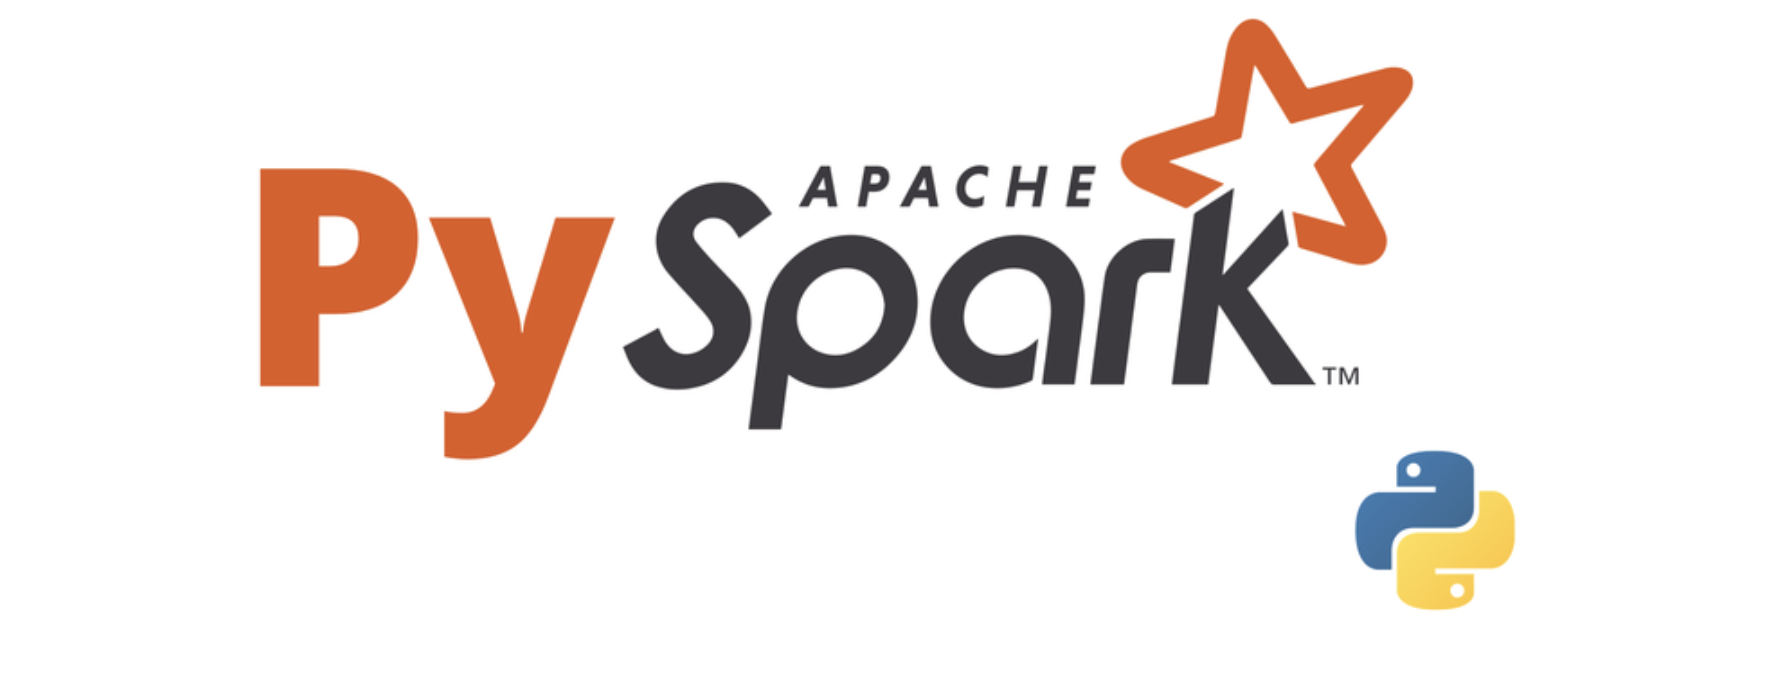

- <b>Spark:</b> Sistema de processamento de dados em larga escala! (Usa ambiente distribuído em várias máquinas)
        - Spark SQL: Consulta e tratamento de dados
        - Spark Streaming: Para processamento de dados em tempo real
        - MLlib: Machine Learning
        - GraphX: Estrutura de gráficos


- <b>Documentação/Recomendação de leitura<b/>
    - [Documentação](https://spark.apache.org/docs/3.1.1/api/python/reference/pyspark.sql.html)
    - [PySpark GitHub](https://github.com/apache/spark/tree/master/python/pyspark)
    - [PySpark by Examples](https://sparkbyexamples.com/pyspark-tutorial/)
    - [PySpark - Entenda a Engine do Spark para Rodar Python](https://aprendizadodemaquina.com/artigos/pyspark-entenda-a-engine-do-spark-para-rodar-python/)
    - [A necessidade de um code style guide para PySpark](https://clouradev.medium.com/a-necessidade-de-um-code-style-guide-para-pyspark-e804e085d84c)
    - [Practical Spark Tips for Data Scientists](https://towardsdatascience.com/practical-spark-tips-for-data-scientists-145d85e9b2d8)
    - [Guia de instalação - Pyspark no Jupyter](https://medium.com/designed-by-data/instalando-apache-pyspark-para-funcionar-com-jupyter-notebook-no-macos-42f992c45842)

### 01. Criando uma conexão/sessão com Spark


In [5]:
from pyspark.sql.session import SparkSession
from pyspark import SparkContext 
sc = SparkContext.getOrCreate() 
spark = SparkSession(sc)

In [6]:
# Biblioteca
from pyspark.sql.functions import *

### 02. Primeiros passos

- <b>2.1 Organização:</b> Faça tudo de maneira organizada!
- <b>2.2 Fluência:</b> Explique minimamente seu código!
- <b>2.3 Identação:</b> Identação sempre é importante!


```python

begining = '2022-01-01'
ending = '2022-05-01'

spark.sql(f"""

select 
    calendar_date as Data
    ,datediff_now as Dias
    ,firstdayof_month
    ,lastdayof_month
from calendar
where 1=1
    and calendar_date >= date('{begining}')
    and calendar_date <= date('{ending}')

""")\
    .withColumnRenamed('firstdayof_month', 'Primeiro dia do mês')\
    .withColumnRenamed('lastdayof_month', 'Último dia do mês')\
    .show()

``` 

### 03. Base de dados

- Visualizar a quantidade de jogos por dia e período do dia
- Montar  classificação dos times

#### 3.1. Função par ler um csv

[Base no Kaggle](https://www.kaggle.com/datasets/andreifnmg/campeonato-braileiro-20092018)

In [7]:
path = "/Users/felipebarreto/Desktop/Iniciando com PySpark/campeonato-brasileiro-full.csv"

df = (
spark.read.format('csv')
    .option("inferSchema", 'true')
    .option("header", 'true')
    .option("sep", ';')
    .load(path)
)

In [10]:
df.show(5, truncate = False)

+---+------+----------+-----+-------+-------------+-----------+------------+----------------+---------------+----------------+---------------+----------------+---------------+
|ID |Rodada|Data      |Hora |Dia    |Mandante     |Visitante  |Vencedor    |Arena           |Mandante Placar|Visitante Placar|Mandante Estado|Visitante Estado|Estado Vencedor|
+---+------+----------+-----+-------+-------------+-----------+------------+----------------+---------------+----------------+---------------+----------------+---------------+
|1  |1     |29/03/2003|16:00|Sabado |Guarani      |Vasco      |Guarani     |brinco de ouro  |4              |2               |SP             |RJ              |SP             |
|2  |1     |29/03/2003|16:00|Sabado |Athletico-PR |Gremio     |Athletico-PR|arena da baixada|2              |0               |PR             |RS              |PR             |
|3  |1     |30/03/2003|16:00|Domingo|Flamengo     |Coritiba   |-           |maracana        |1              |1          

#### 3.2. Retirando valores duplicados

In [14]:
df = df.dropDuplicates()

df.show(3)

+----+------+----------+-----+-------+----------+-----------+----------+-------------------+---------------+----------------+---------------+----------------+---------------+
|  ID|Rodada|      Data| Hora|    Dia|  Mandante|  Visitante|  Vencedor|              Arena|Mandante Placar|Visitante Placar|Mandante Estado|Visitante Estado|Estado Vencedor|
+----+------+----------+-----+-------+----------+-----------+----------+-------------------+---------------+----------------+---------------+----------------+---------------+
| 112|    10|24/05/2003|18:00| Sabado|     Vasco|Ponte Preta|     Vasco|       sao januario|              1|               0|             RJ|              SP|             RJ|
| 757|    18|24/07/2004|16:00| Sabado|Fluminense|Corinthians|Fluminense|           maracana|              2|               0|             RJ|              SP|             RJ|
|1099|    46|19/12/2004|16:00|Domingo|  Flamengo|   Cruzeiro|  Flamengo|raulino de oliveira|              6|               2|

#### 3.3. Verificando as variáveis do dataset

In [15]:
df.columns

['ID',
 'Rodada',
 'Data',
 'Hora',
 'Dia',
 'Mandante',
 'Visitante',
 'Vencedor',
 'Arena',
 'Mandante Placar',
 'Visitante Placar',
 'Mandante Estado',
 'Visitante Estado',
 'Estado Vencedor']

#### 3.4. Selecionando variáveis

In [18]:
selected_columns = [
 'Data',
 'Hora',
 'Dia',
 'Mandante',
 'Visitante',
 'Vencedor',
 'Arena',
 'Mandante Placar',
 'Visitante Placar'
]

df = df.select(selected_columns)

df.show(5)

+----------+-----+------------+-----------+-----------+----------+-------------------+---------------+----------------+
|      Data| Hora|         Dia|   Mandante|  Visitante|  Vencedor|              Arena|Mandante Placar|Visitante Placar|
+----------+-----+------------+-----------+-----------+----------+-------------------+---------------+----------------+
|24/05/2003|18:00|      Sabado|      Vasco|Ponte Preta|     Vasco|       sao januario|              1|               0|
|24/07/2004|16:00|      Sabado| Fluminense|Corinthians|Fluminense|           maracana|              2|               0|
|19/12/2004|16:00|     Domingo|   Flamengo|   Cruzeiro|  Flamengo|raulino de oliveira|              6|               2|
|30/04/2005|18:10|      Sabado|Ponte Preta|Atletico-MG|         -|   moises lucarelli|              3|               3|
|16/11/2005|21:45|Quarta-feira|     Santos|     Parana|         -|        pacaembu pf|              0|               0|
+----------+-----+------------+---------

In [19]:
# outra forma de selecionar variáveis
df[['Data','Mandante']].show(3)

+----------+----------+
|      Data|  Mandante|
+----------+----------+
|24/05/2003|     Vasco|
|24/07/2004|Fluminense|
|19/12/2004|  Flamengo|
+----------+----------+
only showing top 3 rows



#### 3.5. Verificando o schema dos dados

In [20]:
df.printSchema()

root
 |-- Data: string (nullable = true)
 |-- Hora: string (nullable = true)
 |-- Dia: string (nullable = true)
 |-- Mandante: string (nullable = true)
 |-- Visitante: string (nullable = true)
 |-- Vencedor: string (nullable = true)
 |-- Arena: string (nullable = true)
 |-- Mandante Placar: integer (nullable = true)
 |-- Visitante Placar: integer (nullable = true)



In [21]:
# Tipo do objeto
type(df)

pyspark.sql.dataframe.DataFrame

#### 3.6. Dimensões do dataset

In [22]:
# Contagem de linhas
df.count()

7645

In [23]:
# Contagem de colunas
len(df.columns)

9

#### 3.7. Verificando se há valores nulos

In [24]:
[i for i in range(1,11)]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [25]:
df.select(
    [count(when(isnan(c) | col(c).isNull(),c)).alias(c) for c in df.columns]
).show()

+----+----+---+--------+---------+--------+-----+---------------+----------------+
|Data|Hora|Dia|Mandante|Visitante|Vencedor|Arena|Mandante Placar|Visitante Placar|
+----+----+---+--------+---------+--------+-----+---------------+----------------+
|   0|   0|  0|       0|        0|       0|    0|              0|               0|
+----+----+---+--------+---------+--------+-----+---------------+----------------+



In [28]:
lista = []

for c in df.columns:
    lista.append(count(when(isnan(c) | col(c).isNull(),c)).alias(c))
    
df.select(lista).show()

+----+----+---+--------+---------+--------+-----+---------------+----------------+
|Data|Hora|Dia|Mandante|Visitante|Vencedor|Arena|Mandante Placar|Visitante Placar|
+----+----+---+--------+---------+--------+-----+---------------+----------------+
|   0|   0|  0|       0|        0|       0|    0|              0|               0|
+----+----+---+--------+---------+--------+-----+---------------+----------------+



### 04. Ajustes e aprofundamento na base de dados

#### 4.1. Ajuste do tipo da data

In [30]:
df.show(3)

+----------+-----+-------+----------+-----------+----------+-------------------+---------------+----------------+
|      Data| Hora|    Dia|  Mandante|  Visitante|  Vencedor|              Arena|Mandante Placar|Visitante Placar|
+----------+-----+-------+----------+-----------+----------+-------------------+---------------+----------------+
|24/05/2003|18:00| Sabado|     Vasco|Ponte Preta|     Vasco|       sao januario|              1|               0|
|24/07/2004|16:00| Sabado|Fluminense|Corinthians|Fluminense|           maracana|              2|               0|
|19/12/2004|16:00|Domingo|  Flamengo|   Cruzeiro|  Flamengo|raulino de oliveira|              6|               2|
+----------+-----+-------+----------+-----------+----------+-------------------+---------------+----------------+
only showing top 3 rows



In [32]:
df = df.withColumn('Data', to_date(col('Data'), format = 'dd/mm/yyyy'))

In [33]:
# Verificando o schema novamente
df.printSchema()

root
 |-- Data: date (nullable = true)
 |-- Hora: string (nullable = true)
 |-- Dia: string (nullable = true)
 |-- Mandante: string (nullable = true)
 |-- Visitante: string (nullable = true)
 |-- Vencedor: string (nullable = true)
 |-- Arena: string (nullable = true)
 |-- Mandante Placar: integer (nullable = true)
 |-- Visitante Placar: integer (nullable = true)



#### 4.2. Criando novas variáveis no dataset

In [35]:
df.show(3)

+----------+-----+-------+----------+-----------+----------+-------------------+---------------+----------------+
|      Data| Hora|    Dia|  Mandante|  Visitante|  Vencedor|              Arena|Mandante Placar|Visitante Placar|
+----------+-----+-------+----------+-----------+----------+-------------------+---------------+----------------+
|2003-01-24|18:00| Sabado|     Vasco|Ponte Preta|     Vasco|       sao januario|              1|               0|
|2004-01-24|16:00| Sabado|Fluminense|Corinthians|Fluminense|           maracana|              2|               0|
|2004-01-19|16:00|Domingo|  Flamengo|   Cruzeiro|  Flamengo|raulino de oliveira|              6|               2|
+----------+-----+-------+----------+-----------+----------+-------------------+---------------+----------------+
only showing top 3 rows



In [36]:
df = df\
    .withColumn('Hora', substring(col('Hora'), 1, 2).cast('int'))\

df.show(3)

+----------+----+-------+----------+-----------+----------+-------------------+---------------+----------------+
|      Data|Hora|    Dia|  Mandante|  Visitante|  Vencedor|              Arena|Mandante Placar|Visitante Placar|
+----------+----+-------+----------+-----------+----------+-------------------+---------------+----------------+
|2003-01-24|  18| Sabado|     Vasco|Ponte Preta|     Vasco|       sao januario|              1|               0|
|2004-01-24|  16| Sabado|Fluminense|Corinthians|Fluminense|           maracana|              2|               0|
|2004-01-19|  16|Domingo|  Flamengo|   Cruzeiro|  Flamengo|raulino de oliveira|              6|               2|
+----------+----+-------+----------+-----------+----------+-------------------+---------------+----------------+
only showing top 3 rows



In [37]:
df = df.withColumn('Turno', when((col('Hora') >= 0) & (col('Hora') < 6), lit('Noite'))\
                           .when((col('Hora') >= 6) & (col('Hora') < 12), lit('Manhã'))\
                           .when((col('Hora') >= 12) & (col('Hora') < 18), lit('Tarde'))\
                           .when((col('Hora') >= 18) & (col('Hora') <= 23), lit('Noite'))\
                           .otherwise(None))

df.show(3)

+----------+----+-------+----------+-----------+----------+-------------------+---------------+----------------+-----+
|      Data|Hora|    Dia|  Mandante|  Visitante|  Vencedor|              Arena|Mandante Placar|Visitante Placar|Turno|
+----------+----+-------+----------+-----------+----------+-------------------+---------------+----------------+-----+
|2003-01-24|  18| Sabado|     Vasco|Ponte Preta|     Vasco|       sao januario|              1|               0|Noite|
|2004-01-24|  16| Sabado|Fluminense|Corinthians|Fluminense|           maracana|              2|               0|Tarde|
|2004-01-19|  16|Domingo|  Flamengo|   Cruzeiro|  Flamengo|raulino de oliveira|              6|               2|Tarde|
+----------+----+-------+----------+-----------+----------+-------------------+---------------+----------------+-----+
only showing top 3 rows



#### 4.3. Agrupando 

In [40]:
# Agrupando resultados por turno e hora
df2 = df\
.groupBy('Turno','Hora')\
.agg(
    count(col('Hora')).alias('#Total Jogos')
)

df2.show()

+-----+----+------------+
|Turno|Hora|#Total Jogos|
+-----+----+------------+
|Noite|  21|         990|
|Noite|   0|           2|
|Tarde|  17|         431|
|Tarde|  13|           6|
|Tarde|  15|         111|
|Tarde|  12|           4|
|Tarde|  16|        2174|
|Noite|  19|         979|
|Noite|  20|         846|
|Noite|  18|        1802|
|Noite|  22|         133|
|Manhã|  11|         145|
|Manhã|   9|           4|
|Tarde|  14|           3|
|Manhã|  10|          15|
+-----+----+------------+



#### 4.4. Ordenando 

In [42]:
df2.orderBy(['Hora','Turno']).show()

+-----+----+------------+
|Turno|Hora|#Total Jogos|
+-----+----+------------+
|Noite|   0|           2|
|Manhã|   9|           4|
|Manhã|  10|          15|
|Manhã|  11|         145|
|Tarde|  12|           4|
|Tarde|  13|           6|
|Tarde|  14|           3|
|Tarde|  15|         111|
|Tarde|  16|        2174|
|Tarde|  17|         431|
|Noite|  18|        1802|
|Noite|  19|         979|
|Noite|  20|         846|
|Noite|  21|         990|
|Noite|  22|         133|
+-----+----+------------+



#### 4.5. Removendo uma variável

In [44]:
df.show(3)

+----------+----+-------+----------+-----------+----------+-------------------+---------------+----------------+-----+
|      Data|Hora|    Dia|  Mandante|  Visitante|  Vencedor|              Arena|Mandante Placar|Visitante Placar|Turno|
+----------+----+-------+----------+-----------+----------+-------------------+---------------+----------------+-----+
|2003-01-24|  18| Sabado|     Vasco|Ponte Preta|     Vasco|       sao januario|              1|               0|Noite|
|2004-01-24|  16| Sabado|Fluminense|Corinthians|Fluminense|           maracana|              2|               0|Tarde|
|2004-01-19|  16|Domingo|  Flamengo|   Cruzeiro|  Flamengo|raulino de oliveira|              6|               2|Tarde|
+----------+----+-------+----------+-----------+----------+-------------------+---------------+----------------+-----+
only showing top 3 rows



In [45]:
df = df.drop('Hora')

df.show(3)

+----------+-------+----------+-----------+----------+-------------------+---------------+----------------+-----+
|      Data|    Dia|  Mandante|  Visitante|  Vencedor|              Arena|Mandante Placar|Visitante Placar|Turno|
+----------+-------+----------+-----------+----------+-------------------+---------------+----------------+-----+
|2003-01-24| Sabado|     Vasco|Ponte Preta|     Vasco|       sao januario|              1|               0|Noite|
|2004-01-24| Sabado|Fluminense|Corinthians|Fluminense|           maracana|              2|               0|Tarde|
|2004-01-19|Domingo|  Flamengo|   Cruzeiro|  Flamengo|raulino de oliveira|              6|               2|Tarde|
+----------+-------+----------+-----------+----------+-------------------+---------------+----------------+-----+
only showing top 3 rows



#### 4.6. Aplicando filtros

In [52]:
# Com select()
df.select(
    (year('Data') == 2018).alias('Ano 2018')
    ,(col('Vencedor') == 'Santos').alias('Santos')
).show(5, truncate = False)

+--------+------+
|Ano 2018|Santos|
+--------+------+
|false   |false |
|false   |false |
|false   |false |
|false   |false |
|false   |false |
+--------+------+
only showing top 5 rows



In [49]:
# com filter()
df.filter(
    (year('Data') == 2018) &
    (col('Vencedor') == 'Santos')
).show(5, truncate = False)

+----------+-----------+--------+-----------+--------+-------------------------------------------+---------------+----------------+-----+
|Data      |Dia        |Mandante|Visitante  |Vencedor|Arena                                      |Mandante Placar|Visitante Placar|Turno|
+----------+-----------+--------+-----------+--------+-------------------------------------------+---------------+----------------+-----+
|2018-01-13|Sabado     |Santos  |Corinthians|Santos  |estadio municipal paulo machado de carvalho|1              |0               |Noite|
|2018-01-18|Sabado     |Santos  |Sport      |Santos  |estadio urbano caldeira                    |3              |0               |Tarde|
|2018-01-05|Sexta-feira|Vitoria |Santos     |Santos  |barradao                                   |0              |1               |Noite|
|2018-01-09|Domingo    |Parana  |Santos     |Santos  |vila capanema                              |0              |2               |Noite|
|2018-01-24|Sabado     |Santos  |A

In [50]:
# com where()
df.where(
    (year('Data') == 2018) &
    (col('Vencedor') == 'Santos')
).show(5, truncate = False)

+----------+-----------+--------+-----------+--------+-------------------------------------------+---------------+----------------+-----+
|Data      |Dia        |Mandante|Visitante  |Vencedor|Arena                                      |Mandante Placar|Visitante Placar|Turno|
+----------+-----------+--------+-----------+--------+-------------------------------------------+---------------+----------------+-----+
|2018-01-13|Sabado     |Santos  |Corinthians|Santos  |estadio municipal paulo machado de carvalho|1              |0               |Noite|
|2018-01-18|Sabado     |Santos  |Sport      |Santos  |estadio urbano caldeira                    |3              |0               |Tarde|
|2018-01-05|Sexta-feira|Vitoria |Santos     |Santos  |barradao                                   |0              |1               |Noite|
|2018-01-09|Domingo    |Parana  |Santos     |Santos  |vila capanema                              |0              |2               |Noite|
|2018-01-24|Sabado     |Santos  |A

#### 4.7. Função agg()

In [53]:
# Mínimos, máximos, contagem..
df.agg(
    min(col('Data')).alias('Menor data')
    ,max(col('Data')).alias('Maior data')
    ,count(col('Data')).alias('Jogos')
    ,countDistinct('Mandante').alias('Mandantes diferentes')
    ,mean(col('Mandante Placar')).alias('Média de gols mandante')
    ,mean(col('Visitante Placar')).alias('Média de gols visitante')
).show()

+----------+----------+-----+--------------------+----------------------+-----------------------+
|Menor data|Maior data|Jogos|Mandantes diferentes|Média de gols mandante|Média de gols visitante|
+----------+----------+-----+--------------------+----------------------+-----------------------+
|2003-01-01|2021-01-31| 7645|                  45|    1.5540876389797253|     1.0272073250490517|
+----------+----------+-----+--------------------+----------------------+-----------------------+



#### 4.8 Função summary()

In [54]:
# Algumas estatísticas
df.summary().show()

+-------+-----------+----------+----------+--------+-------------------+------------------+------------------+-----+
|summary|        Dia|  Mandante| Visitante|Vencedor|              Arena|   Mandante Placar|  Visitante Placar|Turno|
+-------+-----------+----------+----------+--------+-------------------+------------------+------------------+-----+
|  count|       7645|      7645|      7645|    7645|               7645|              7645|              7645| 7645|
|   mean|       null|      null|      null|    null|               null|1.5540876389797253|1.0272073250490517| null|
| stddev|       null|      null|      null|    null|               null|1.2342617159348899|1.0301791513017493| null|
|    min|    Domingo|America-MG|America-MG|       -|    a campanella pf|                 0|                 0|Manhã|
|    25%|       null|      null|      null|    null|               null|                 1|                 0| null|
|    50%|       null|      null|      null|    null|            

#### 4.9. Criando uma função

In [55]:
# Função que agrupa e traz a contagem
def count_group(data, var):
    df = (
        data
        .groupBy([var])
        .agg(
            count(col(var)).alias('Quantidade')
        )
        .orderBy(col('Quantidade').desc())
    )
    return df

In [56]:
count_group(df, 'Visitante').show(5)

+-------------+----------+
|    Visitante|Quantidade|
+-------------+----------+
|     Flamengo|       372|
|   Fluminense|       371|
|       Santos|       371|
|    Sao Paulo|       371|
|Internacional|       352|
+-------------+----------+
only showing top 5 rows



### 05. Trabalhando com SQL

#### 5.1. Criando uma view temporária

In [57]:
df.createOrReplaceTempView("df_view")

In [63]:
new_df = spark.sql("""

select
    Data
    ,Mandante
    ,Vencedor
from df_view
where year(Data) = 2018

""")

new_df.show(3, truncate=False)

+----------+-----------+-----------+
|Data      |Mandante   |Vencedor   |
+----------+-----------+-----------+
|2018-01-26|Botafogo-RJ|Botafogo-RJ|
|2018-01-22|Fluminense |Fluminense |
|2018-01-20|Parana     |-          |
+----------+-----------+-----------+
only showing top 3 rows



#### 5.2. Carregando a tabela criada

In [64]:
# Rodando um código anteriormente gerado
%run "/Users/felipebarreto/Desktop/pyspark_calendar.py"

In [69]:
spark.sql("""

select * from calendar

""").show(3)

+-------------+------------+------------+----+-----+---------+----------+---------+----------+-------+------------+----------+---------+---------------+--------------+----------+
|calendar_date|datediff_now|weekday_name|year|month|dayofweek|dayofmonth|dayofyear|weekofyear|quarter|quarter_year|month_year|week_year|lastdayof_month|lastdayof_week|is_weekend|
+-------------+------------+------------+----+-----+---------+----------+---------+----------+-------+------------+----------+---------+---------------+--------------+----------+
|   2000-01-01|        8175|    Saturday|2000|    1|        7|         1|        1|        52|      1|      1/2000|    1/2000|  52/2000|          false|          true|      true|
|   2000-01-02|        8174|      Sunday|2000|    1|        1|         2|        2|        52|      1|      1/2000|    1/2000|  52/2000|          false|         false|      true|
|   2000-01-03|        8173|      Monday|2000|    1|        2|         3|        3|         1|      1|   

In [66]:
# Lendo a tabela completa
calendar.columns

['calendar_date',
 'datediff_now',
 'weekday_name',
 'year',
 'month',
 'dayofweek',
 'dayofmonth',
 'dayofyear',
 'weekofyear',
 'quarter',
 'quarter_year',
 'month_year',
 'week_year',
 'lastdayof_month',
 'lastdayof_week',
 'is_weekend']

In [67]:
# schema da tabela
calendar.printSchema()

root
 |-- calendar_date: date (nullable = false)
 |-- datediff_now: integer (nullable = false)
 |-- weekday_name: string (nullable = false)
 |-- year: integer (nullable = false)
 |-- month: integer (nullable = false)
 |-- dayofweek: integer (nullable = false)
 |-- dayofmonth: integer (nullable = false)
 |-- dayofyear: integer (nullable = false)
 |-- weekofyear: integer (nullable = false)
 |-- quarter: integer (nullable = false)
 |-- quarter_year: string (nullable = false)
 |-- month_year: string (nullable = false)
 |-- week_year: string (nullable = false)
 |-- lastdayof_month: boolean (nullable = false)
 |-- lastdayof_week: boolean (nullable = false)
 |-- is_weekend: boolean (nullable = false)



#### 5.3. Trabalhando com JOIN

In [72]:
# jon com as colunas 'calendar_date','weekday_name','is_weekend' da tabela calendar
df.join(
    calendar.select('calendar_date','weekday_name'), 
    on = df['Data'] == calendar['calendar_date'], 
    how = 'left'
).drop(calendar.calendar_date).show(5)

+----------+------------+-----------+-----------+----------+-------------------+---------------+----------------+-----+------------+
|      Data|         Dia|   Mandante|  Visitante|  Vencedor|              Arena|Mandante Placar|Visitante Placar|Turno|weekday_name|
+----------+------------+-----------+-----------+----------+-------------------+---------------+----------------+-----+------------+
|2003-01-24|      Sabado|      Vasco|Ponte Preta|     Vasco|       sao januario|              1|               0|Noite|      Friday|
|2004-01-24|      Sabado| Fluminense|Corinthians|Fluminense|           maracana|              2|               0|Tarde|    Saturday|
|2004-01-19|     Domingo|   Flamengo|   Cruzeiro|  Flamengo|raulino de oliveira|              6|               2|Tarde|      Monday|
|2005-01-30|      Sabado|Ponte Preta|Atletico-MG|         -|   moises lucarelli|              3|               3|Noite|      Sunday|
|2005-01-16|Quarta-feira|     Santos|     Parana|         -|        p

In [75]:
spark.sql("""

select
    a.*
    ,b.weekday_name
from df_view as a
left join calendar as b
on a.Data = b.calendar_date

""").show(5)

+----------+------------+-----------+-----------+----------+-------------------+---------------+----------------+-----+------------+
|      Data|         Dia|   Mandante|  Visitante|  Vencedor|              Arena|Mandante Placar|Visitante Placar|Turno|weekday_name|
+----------+------------+-----------+-----------+----------+-------------------+---------------+----------------+-----+------------+
|2003-01-24|      Sabado|      Vasco|Ponte Preta|     Vasco|       sao januario|              1|               0|Noite|      Friday|
|2004-01-24|      Sabado| Fluminense|Corinthians|Fluminense|           maracana|              2|               0|Tarde|    Saturday|
|2004-01-19|     Domingo|   Flamengo|   Cruzeiro|  Flamengo|raulino de oliveira|              6|               2|Tarde|      Monday|
|2005-01-30|      Sabado|Ponte Preta|Atletico-MG|         -|   moises lucarelli|              3|               3|Noite|      Sunday|
|2005-01-16|Quarta-feira|     Santos|     Parana|         -|        p

### 06. Criando DataFrame

In [76]:
columns = ['colA', 'colB']

lines = [
    ('lin1', '10')
    ,('lin1', '10')
    ,('lin1', '10')
]

df3 = spark.createDataFrame(lines, columns)

In [77]:
df3.show()

+----+----+
|colA|colB|
+----+----+
|lin1|  10|
|lin1|  10|
|lin1|  10|
+----+----+

